## Experiment 4: Binary Classification using Logistic Regression and SVM

R Padmashri   
3122 23 5001 093   
CSE - B

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('spambase.csv')
print(df.head())
print(df.shape)

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

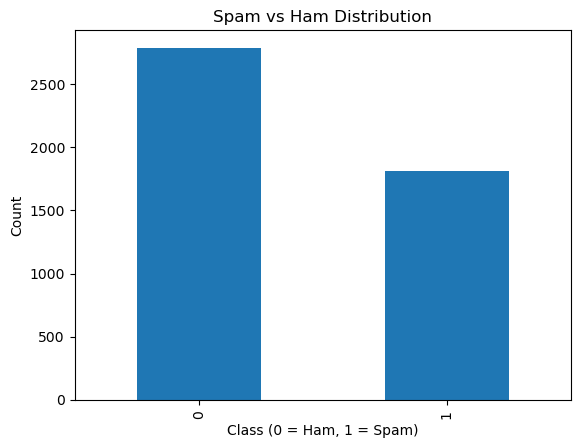

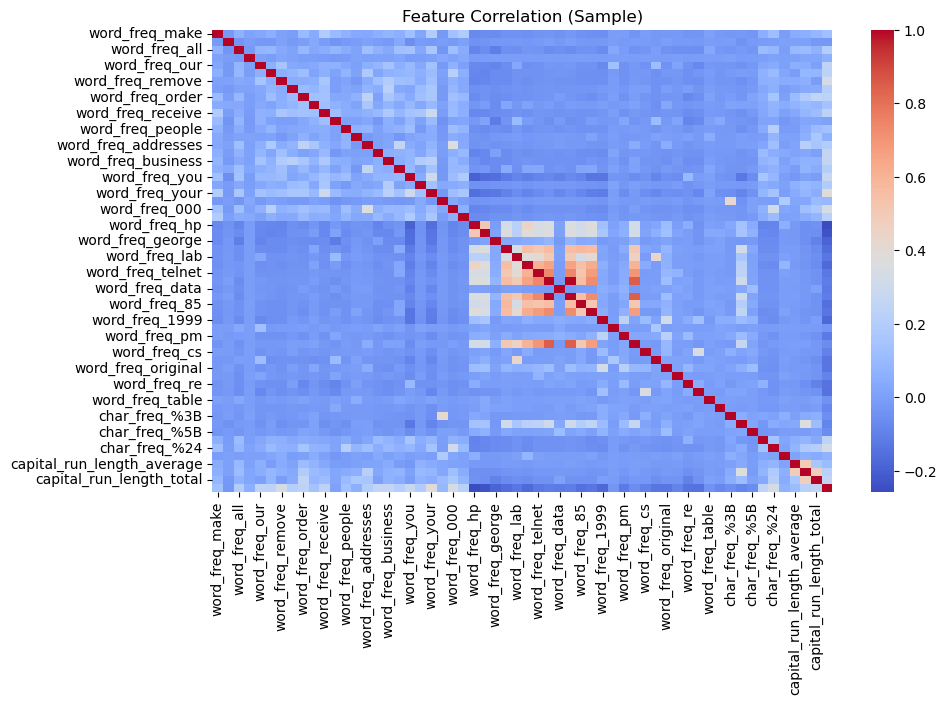

In [15]:
# Target distribution
plt.figure()
df.iloc[:, -1].value_counts().plot(kind='bar')
plt.title('Spam vs Ham Distribution')
plt.xlabel('Class (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()


# Correlation heatmap (sampled for readability)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation (Sample)')
plt.show()

### Data Preprocessing

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Baseline Logistic Regression

In [6]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred_lr = log_reg.predict(X_test)


print('Logistic Regression Baseline')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Baseline
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



#### Hyperparameter Tuning – Logistic Regression

In [7]:
param_grid_lr = {
'C': [0.01, 0.1, 1, 10, 100],
'penalty': ['l1', 'l2'],
'solver': ['liblinear', 'saga']
}


grid_lr = GridSearchCV(
LogisticRegression(max_iter=5000),
param_grid_lr,
cv=5,
scoring='accuracy'
)


grid_lr.fit(X_train, y_train)


print('Best Logistic Regression Params:', grid_lr.best_params_)
print('Best CV Accuracy:', grid_lr.best_score_)


best_lr = grid_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)

Best Logistic Regression Params: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy: 0.923913043478261


### Support Vector Machine – Different Kernels

In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}


for k in kernels:
    svm = SVC(kernel=k)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_results[k] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred)
    }
    

print('SVM Kernel-wise Performance')
for k, v in svm_results.items():
    print(k, v)

SVM Kernel-wise Performance
linear {'accuracy': 0.9305103148751357, 'f1': 0.9106145251396648}
poly {'accuracy': 0.7795874049945711, 'f1': 0.6219739292364991}
rbf {'accuracy': 0.9272529858849077, 'f1': 0.9055007052186178}
sigmoid {'accuracy': 0.8838219326818675, 'f1': 0.8524137931034482}


#### Hyperparameter Tuning – SVM

In [9]:
param_grid_svm = {
'C': [0.1, 1, 10, 100],
'gamma': ['scale', 'auto'],
'kernel': ['linear', 'rbf']
}


grid_svm = GridSearchCV(
SVC(),
param_grid_svm,
cv=5,
scoring='accuracy'
)


grid_svm.fit(X_train, y_train)


print('Best SVM Params:', grid_svm.best_params_)
print('Best CV Accuracy:', grid_svm.best_score_)


best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9339673913043478


### K-Fold Cross Validation (K=5)

In [10]:
lr_cv = cross_val_score(best_lr, X_scaled, y, cv=5)
svm_cv = cross_val_score(best_svm, X_scaled, y, cv=5)


print('Logistic Regression CV Scores:', lr_cv)
print('SVM CV Scores:', svm_cv)

Logistic Regression CV Scores: [0.91965255 0.93152174 0.89565217 0.95108696 0.82391304]
SVM CV Scores: [0.93268187 0.93369565 0.95       0.94891304 0.85      ]


### Comparison

In [11]:
comparison = pd.DataFrame({
'Model': ['Logistic Regression', 'SVM'],
'Accuracy': [accuracy_score(y_test, y_pred_best_lr), accuracy_score(y_test, y_pred_best_svm)],
'F1 Score': [f1_score(y_test, y_pred_best_lr), f1_score(y_test, y_pred_best_svm)]
})


print(comparison)

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.925081  0.903226
1                  SVM  0.927253  0.905501


### Learning Outcomes
   
- Understood linear vs margin-based classifiers
- Performed EDA and preprocessing
- Applied GridSearchCV
- Compared models using multiple metrics